<a href="https://colab.research.google.com/github/ikyro/mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download `training data` and `test data`

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.MNIST(
  root='data',
  train=True,
  download=True,
  transform=ToTensor()
)

test_data = datasets.MNIST(
  root='data',
  train=False,
  download=True,
  transform=ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



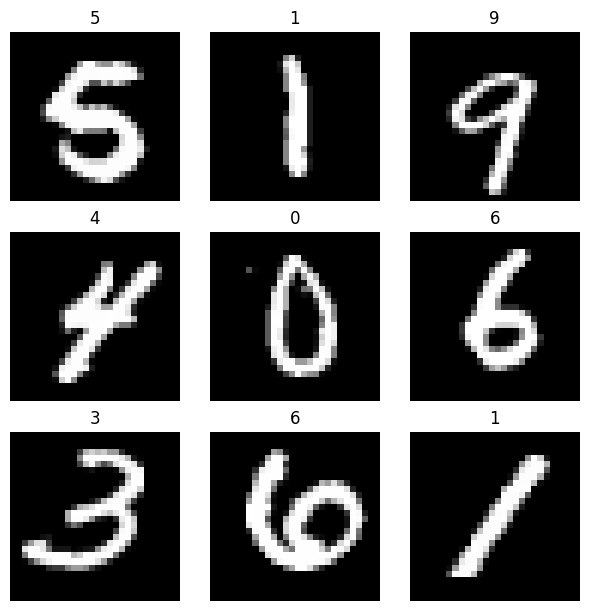

In [32]:
import matplotlib.pyplot as plt
import torch

figure = plt.figure(figsize=(6, 6), layout='constrained')
cols = 3
rows = 3

for i in range(cols * rows):
  rand_index = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[rand_index]
  figure.add_subplot(rows, cols, i + 1)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')

plt.show()

In [33]:
print(
  f'training data size: {training_data.data.size()}',
  f'test data size: {test_data.data.size()}',
  sep='\n'
)

#print(training_data.data.size()[1:])

training data size: torch.Size([60000, 28, 28])
test data size: torch.Size([10000, 28, 28])


In [34]:
from torch import cuda

device = 'cuda' if cuda.is_available() else 'cpu'

print(f'using: {device}')

using: cuda


In [36]:
from torch import nn, autocast

class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(in_features=28*28, out_features=512),
      nn.ReLU(),
      nn.Linear(in_features=512, out_features=512),
      nn.ReLU(),
      nn.Linear(in_features=512, out_features=10),
    )

  @autocast(device_type=device)
  def forward(self, x):
    x = self.flatten(x)

    logits = self.linear_relu_stack(x)

    return logits

In [37]:
from torch.utils.data import DataLoader

training_loader = DataLoader(
  training_data,
  batch_size=100,
  shuffle=True,
  num_workers=2,
  pin_memory=True,
)

test_loader = DataLoader(
  test_data,
  batch_size=100,
  shuffle=True,
  num_workers=2,
  pin_memory=True,
)

In [38]:
model = NeuralNetwork().to(device)

In [42]:
from torch import nn, optim
import numpy as np

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
epochs = 5

def train_model():
  for i, (inputs, labels) in enumerate(training_loader):
    inputs = inputs.to(device)
    labels = torch.tensor(labels).to(device)

    optimizer.zero_grad()

    with autocast(device_type=device):
      outputs = model(inputs)
      loss = loss_fn(outputs, labels)
    
    loss.backward()
    optimizer.step()

    if i % 10 == 0:
      loss = loss.item()
      current = (i + 1) * len(inputs)

      print(f'loss: {loss:.4f} [{current:>5d}/{len(training_data):>5d}]')

def eval_model():
  val_loss = []
  val_acc = []

  with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_loader):
      inputs = inputs.to(device)
      labels = torch.tensor(labels).to(device)

      with autocast(device_type=device):
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        val_loss.append(loss.item())
        val_acc.append((outputs.argmax(1) == labels).float().mean().item())
        print(f"evaluation loss: {np.mean(val_loss):.4f} evaluation accuracy: {np.mean(val_acc):.4f}")
  
for epoch in range(1, epochs + 1):
  print(f'training epoch: {epoch}/{epochs}')

  model.train()
  train_model()

  print(f'evaluation epoch: {epoch}/{epochs}')
  model.eval()
  eval_model()


training epoch: 1/5
loss: 0.0127 [  100/60000]


<ipython-input-42-4e1adf2e12cd>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels).to(device)


loss: 0.0021 [ 1100/60000]
loss: 0.0013 [ 2100/60000]
loss: 0.0010 [ 3100/60000]
loss: 0.0007 [ 4100/60000]
loss: 0.0021 [ 5100/60000]
loss: 0.0002 [ 6100/60000]
loss: 0.0067 [ 7100/60000]
loss: 0.0012 [ 8100/60000]
loss: 0.0016 [ 9100/60000]
loss: 0.0351 [10100/60000]
loss: 0.0038 [11100/60000]
loss: 0.0001 [12100/60000]
loss: 0.0128 [13100/60000]
loss: 0.0029 [14100/60000]
loss: 0.0605 [15100/60000]
loss: 0.0131 [16100/60000]
loss: 0.0011 [17100/60000]
loss: 0.0846 [18100/60000]
loss: 0.0036 [19100/60000]
loss: 0.0166 [20100/60000]
loss: 0.0106 [21100/60000]
loss: 0.0001 [22100/60000]
loss: 0.0166 [23100/60000]
loss: 0.0342 [24100/60000]
loss: 0.0593 [25100/60000]
loss: 0.0270 [26100/60000]
loss: 0.0124 [27100/60000]
loss: 0.0262 [28100/60000]
loss: 0.0298 [29100/60000]
loss: 0.0010 [30100/60000]
loss: 0.0003 [31100/60000]
loss: 0.1255 [32100/60000]
loss: 0.0083 [33100/60000]
loss: 0.1154 [34100/60000]
loss: 0.0223 [35100/60000]
loss: 0.0059 [36100/60000]
loss: 0.0005 [37100/60000]
l

<ipython-input-42-4e1adf2e12cd>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels).to(device)


evaluation loss: 0.0742 evaluation accuracy: 0.9855
evaluation loss: 0.0720 evaluation accuracy: 0.9850
evaluation loss: 0.0670 evaluation accuracy: 0.9862
evaluation loss: 0.0625 evaluation accuracy: 0.9871
evaluation loss: 0.0697 evaluation accuracy: 0.9867
evaluation loss: 0.0669 evaluation accuracy: 0.9869
evaluation loss: 0.0665 evaluation accuracy: 0.9871
evaluation loss: 0.0696 evaluation accuracy: 0.9872
evaluation loss: 0.0768 evaluation accuracy: 0.9863
evaluation loss: 0.0775 evaluation accuracy: 0.9855
evaluation loss: 0.0795 evaluation accuracy: 0.9843
evaluation loss: 0.0857 evaluation accuracy: 0.9841
evaluation loss: 0.0865 evaluation accuracy: 0.9830
evaluation loss: 0.0877 evaluation accuracy: 0.9829
evaluation loss: 0.0868 evaluation accuracy: 0.9824
evaluation loss: 0.0837 evaluation accuracy: 0.9831
evaluation loss: 0.0814 evaluation accuracy: 0.9833
evaluation loss: 0.0790 evaluation accuracy: 0.9839
evaluation loss: 0.0770 evaluation accuracy: 0.9841
evaluation l

In [24]:
torch.save(model.state_dict(), 'model.ckpt')